## 05.06. 회귀로 예측하기

다음과 같은 식으로  $y$의 예측값을 얻을 수 있다는 것을 다시 되짚어봅시다.

$$\hat{y_t} = \hat\beta_{0} + \hat\beta_{1} x_{1,t} + \hat\beta_{2} x_{2,t} + \cdots + \hat\beta_{k} x_{k,t},$$

여기에서 추정된 계수를 포함하고 회귀식의 오차를 무시합니다. 예측변수(predictor variable)의 값들  $x_{1,t},\dots,x_{k,t}$ for $t=1,\dots,T$을 넣으면  $y$의 (학습-표본) 적합값을 얻습니다. 하지만, 여기에서는 $y$의 미래 값을 예측하는 것에 관심이 있습니다.

<br>

### 사전 예측 대 사후 예측

시계열 데이터에 회귀 모델을 사용할 때, 예측치를 계산할 때 알려진 가정에 따라 나올 수 있는 다양한 종류의 예측값을 구분해야 합니다.

**사전 예상값(Ex-ante forecast)**은 미리 쓸 수 있는 정보만으로 내는 것입니다. 예를 들어, 표본이 끝난 다음 분기의 미국 소비 백분율 변화에 대한 사전 예상값에는 2016 Q3까지 사용할 수 있는 정보만 사용해야 합니다. 이는 당시에 이용할 수 있는 정보를 가지고 미리 낸 진정한 예측값입니다. 따라서 사전 예상값을 내려면 모델에 예측변수(predictor variable)의 미래 값(예상값)이 필요합니다.

**사후 예상값(Ex-post forecast)**은 예측변수(predictor variable)에 대한 이후 정보로 내는 것입니다. 예를 들어, 소비에 대한 사후 예상값을 낼 때 일단 예측변수(predictor variable)의 실제 값을 관측하고나서 실제 값을 사용할 수도 있습니다. 이러한 예상값은 실제 예상값은 아니지만, 예측 모델이 작동하는 것을 살펴볼 때 유용합니다.

사후 예상값을 내는 모델을 예측 기간의 데이터를 이용하여 추정해서는 안 됩니다. 즉, 사후 예상값은 예측변수($x$ 변수)에 관한 지식을 가정할 수 있지만, 예측할 데이터($y$  변수)에 대한 지식을 가정해서는 안 됩니다.

사전 예상값과 사후 예상값을 비교 평가하면 예측 불확실성의 원인을 구분하는데 도움이 될 수 있습니다. 예측 오차가 안 좋은 예측 모델 때문에 생겼는지 아니면 예측변수(predictor variable)에 대한 안 좋은 예측값 때문에 생겼는지 나타낼 것입니다.

<br>

### 예제: 호주 분기별 맥주 생산량

일반적으로, 사전 예상값을 낼 때 예측변수(predictor variable)의 실제 미래 값을 쓸 수 없습니다. 왜냐하면 예측변수(predictor variable)의 값을 미리 알 수 없기 때문입니다.

하지만, 5.4 절에서 소개한 특별한 예측변수(predictor vvariable)는 달력 변수(예: 계절성 가변수나 공휴일 표시자) 또는 시간의 확정적인(deterministic) 기능(예: 시간 추세)에 근거하기 때문에 미리 모두 알고 있습니다. 이러한 경우에는, 사후 예상값(ex-post forecast)과 사전 예상값(ex-ante forecast)이 차이가 없습니다.


In [3]:
library(tidyverse)
library(fpp3)
library(fpp2)
library(fpp)
library(forecast)

In [5]:
beer2 <- window(ausbeer, start=1992)
fit.beer <- tslm(beer2 ~ trend + season)
fcast <- forecast(fit.beer)

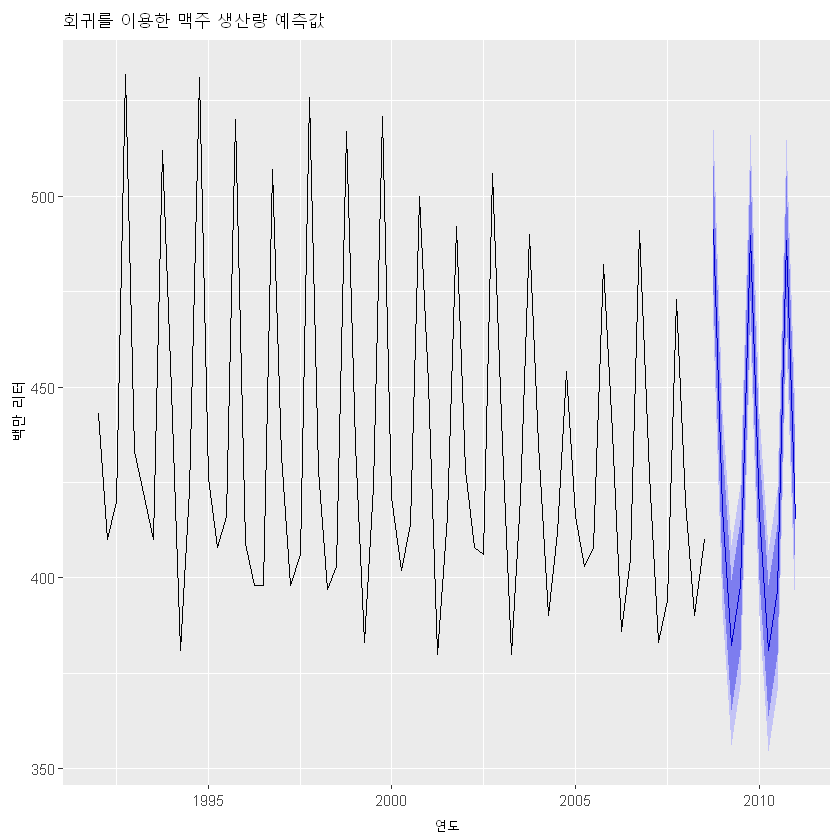

In [6]:
autoplot(fcast) +
  ggtitle("회귀를 이용한 맥주 생산량 예측값") +
  xlab("연도") + ylab("백만 리터")

<br>

### 시나리오 기반 예측

이 설정에서, 예측하는 사람은 관심 있는 예측변수(predictor variable)에 대한 가능한 시나리오를 가정합니다. 

예를 들어, 미국 정책 담당자는 고용률 변화 없이 소득과 저축에 대해 각각 1%와 0.5%의 지속적인 성장이 일어나는 것과, 각각 1%와 0.5%의 감소가 일어나는 상황에서 소비에서 예측된 변화량을 표본 이후 각 네 분기에 대해 비교하는 일에 관심이 있을 수 있습니다. 

결과 예측치를 아래에 계산하여 그림에 나타냈습니다. 시나리오 기반의 예측치에 대해서는 예측 구간(prediction interval)이 예측변수(predictor variable)의 미래값과 관련된 불확실성을 포함하지 않습니다. 예측변수(predictor variable)의 값을 미리 안다고 가정합니다.

In [7]:
fit.consBest <- tslm(Consumption ~ Income + Savings + Unemployment,
  data = uschange)

In [8]:
h <- 4

In [12]:
newdata <- data.frame(
    Income = rep(1, h),
    Savings = rep(0.5, h),
    Unemployment = c(0, 0, 0, 0))
fcast.up <- forecast(fit.consBest, newdata = newdata)

In [13]:
newdata <- data.frame(
    Income = rep(-1, h),
    Savings = rep(-0.5, h),
    Unemployment = rep(0, h))
fcast.down <- forecast(fit.consBest, newdata = newdata)

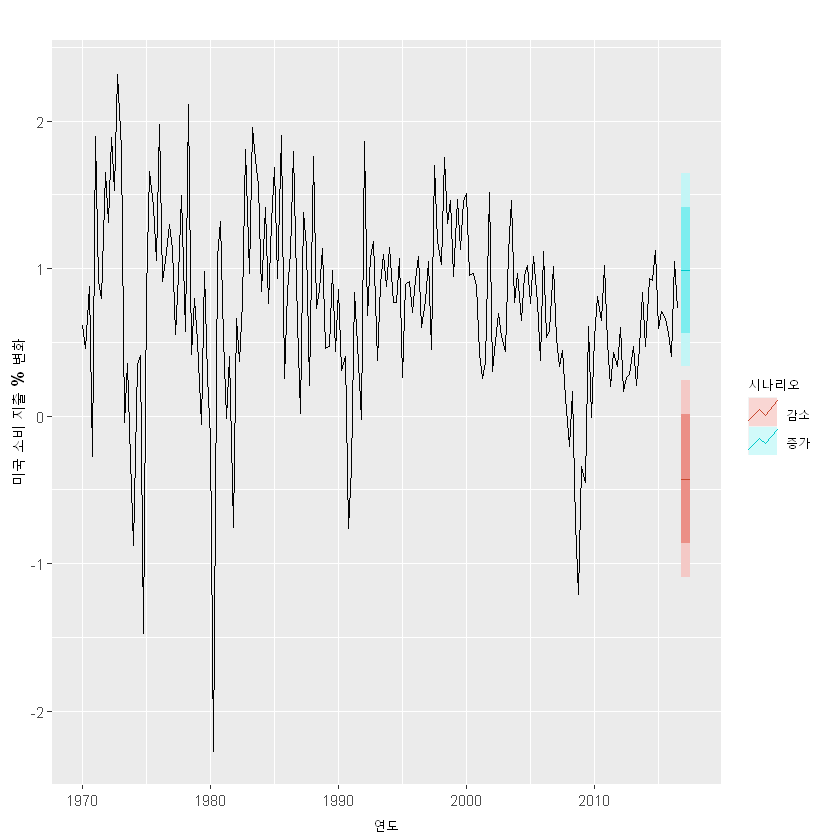

In [14]:
autoplot(uschange[,1]) +
  ylab("미국 소비 지출 % 변화") +
  autolayer(fcast.up, PI = TRUE, series = "증가") +
  autolayer(fcast.down, PI = TRUE, series = "감소") +
  guides(colour=guide_legend(title = "시나리오")) +
  xlab("연도")

<br>

### 예측 회귀 모델 세우기

회귀 모델의 가장 큰 장점은 관심 있는 목표 예상변수(forecast variable)와 예측변수(predictor variable)의 중요한 관계를 잡아내는데 사용할 수 있다는 것입니다. 하지만, 주된 어려움은 사전 예상값(ex-ante forecast)을 내기 위해, 모델에 각 예측변수(predictor variable)의 미래값이 필요하다는 것입니다. 시나리오 기반 예측에 관심이 있다면, 이러한 모델은 유용합니다. 하지만, 사후 예측에 주된 관심이 있다면, 예측변수(predictor variable)에 대한 예측값을 얻는 것은 어려운 일이 될 수 있습니다(예측변수에 대한 예측값을 내는 많은 경우는 예측변수(predictor variable) 없이 목적 예상변수(forecast variable)를 직접 예측하는 것보다 더 어려울 수 있습니다).

**대안은 예측변수(predictor variable)로 시차 값(lagged value)을 사용하는 것입니다. h-단계 앞 예측을 내는데 관심이 있다고 하면  $h=1,2\dots$에 대해 다음과 같이 쓸 수 있습니다.**

$$y_{t+h}=\beta_0+\beta_1x_{1,t}+\dots+\beta_kx_{k,t}+\varepsilon_{t+h}$$

예측변수(predictor variable) 모음은  $y$ 를 관찰하기 전 $h$시간 주기에 관찰한 $x$의 값으로 구성됩니다. 따라서, 추정된 모델을 미래에 투영할 때, (즉, $T$표본 넘어), 모든 예측변수(predictor variable) 값을 이용할 수 있습니다.

예측변수(predictor variable)의 시차값(lagged value)을 포함하면 예측값을 쉽게 낼 수 있도록 모델을 작동시키기도 하면서, 직관적으로 이해할 수 있도록 만들기도 합니다. 예를 들면, 생산 증가를 목표로 하는 정책 변화의 효과는 소비 지출에 바로 영향을 미치지 않을 수도 있습니다. 시차 효과와 함께 일어날 가능성이 높습니다.

<br>

### 예측구간

여기에서 한 예측값을 다음과 같은 식으로 낼 수 있습니다,

$$\hat{y}=\hat{\beta}_0+\hat{\beta}_1x.$$

회귀 오차가 정규 분포를 따른다는 것을 가정하면, 이 예측과 관련된 근사적인 95% 예측구간(예측 간격이라고도 불립니다)은 다음과 같이 주어집니다.

$$\begin{equation}
  \hat{y} \pm 1.96 \hat{\sigma}_e\sqrt{1+\frac{1}{T}+\frac{(x-\bar{x})^2}{(T-1)s_x^2}},
  \
\end{equation}$$

$T$는 관측값의 전체 개수, $\bar{x}$는 관측된 $x$값의 평균, $s_x$는 관측된 $x$값의 표준 편차, $\hat{\sigma_e}$는 $\begin{equation}
  \hat{\sigma}_e=\sqrt{\frac{1}{T-k-1}\sum_{t=1}^{T}{e_t^2}}.
  \
\end{equation}$으로 주어지는 회귀의 표준 오차입니다. 비슷하게, 80% 예측 구간은 1.96을 1.28로 바꾸어 얻을 수 있습니다. 다른 예측구간(prediction interval)은 1.96을 적절한 값으로 바꾸어 얻을 수 있습니다. 

<br>

#### 예제

미국 소비 예제에서 추정된 단순 회귀 선은 다음과 같습니다.

$$\hat{y}_t=0.55 + 0.28x_t.$$

다음 4개의 분기에 대해 개인 소득이  $\bar{x}0.72%$ 의 과거 평균 값만큼 증가할 것을 가정하면, 소비가 0.75% 만큼 증가한다는 예측을 얻고 관련된 95% 예측 구간과 80% 예측 구간은 각각 [−0.45,1.94] 와 [−0.03,1.52] 입니다

5%의 극단적인 수입 증가를 가정한다면, 예측구간(prediction interval)이 상당히 넓어집니다.

In [15]:
fit.cons <- tslm(Consumption ~ Income, data=uschange)
h <- 4

In [17]:
fcast.ave <- forecast(fit.cons,
  newdata = data.frame(
    Income = rep(mean(uschange[, "Income"]), h)))
fcast.up <- forecast(fit.cons,
  newdata = data.frame(Income = rep(5, h)))

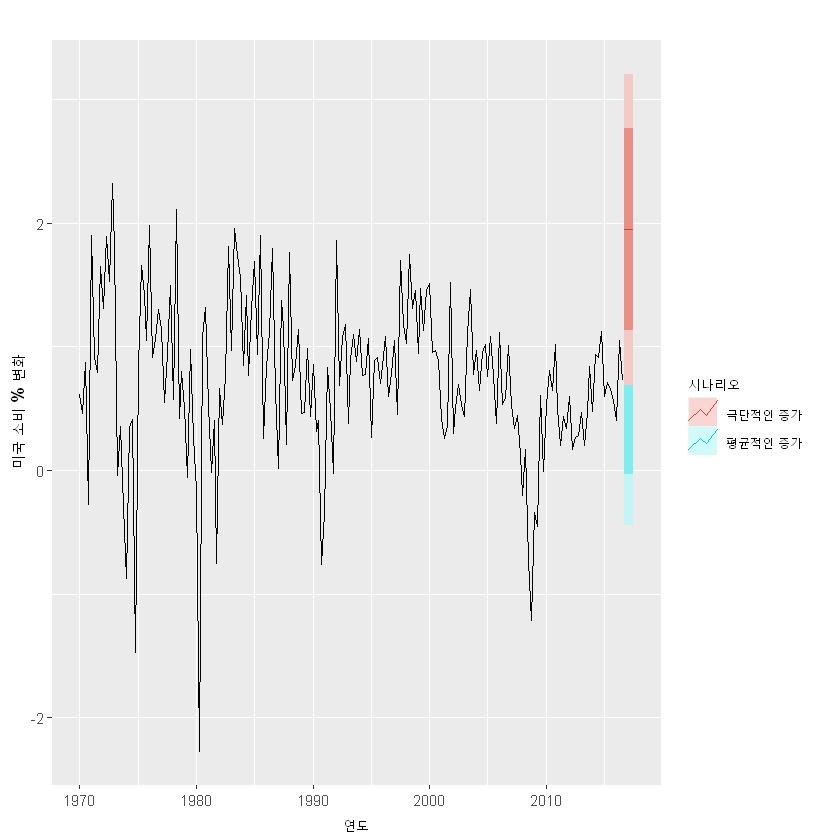

In [18]:
autoplot(uschange[,"Consumption"]) +
  ylab("미국 소비 % 변화") +
  autolayer(fcast.ave, series = "평균적인 증가",
    PI = TRUE) +
  autolayer(fcast.up, series = "극단적인 증가",
    PI = TRUE) +
  guides(colour = guide_legend(title = "시나리오")) +
  xlab("연도")

<br>

## 05.07. 행렬 정식화

$$y_{t} = \beta_{0} + \beta_{1} x_{1,t} + \beta_{2} x_{2,t} + \cdots +
  \beta_{k} x_{k,t} + \varepsilon_{t}$$

여기에서  $ε_t$은 평균이 0이고 분산이 $σ^2$ 입니다. 이것은 목표 예상변수(forecast variable)와 예측변수(predictor variable) 사이의 관계를 나타냅니다.

이것을 하나의 식에 주어지는 목표 예상변수(forecast variable)의 값을 나타내는 행렬 형태로 쓰면 편리할 수 있습니다. 다음과 같이 둡시다. ${y} = (y_{1},\dots,y_{T})'$, ${\varepsilon} = (\varepsilon_{1},\dots,\varepsilon_{T})'$, ${\beta} = (\beta_{0},\dots,\beta_{k})'$ 그리고

$${X} = \left[
    \begin{matrix}
      1 & x_{1,1} & x_{2,1} & \dots & x_{k,1}\\
      1 & x_{1,2} & x_{2,2} & \dots & x_{k,2}\\
      \vdots& \vdots& \vdots&& \vdots\\
      1 & x_{1,T}& x_{2,T}& \dots& x_{k,T}
    \end{matrix}\right].$$
    
<br>
    
$${y} = {X}{\beta} + {\varepsilon}.$$

여기에서 $ε$ 은 평균이 0 이고 분산이 $σ^2I$입니다. 행렬 $X$에는 관측값의 수를 나타내는 $T$행이 있고, 예측변수(predictor variable)의 수에 1을 더한 열로 표현되는 절편을 나타내는 $k+1$ 열이 있습니다.

<br>

### 최소 제곱 추정

다음과 같은 표현식을 최소화하여 최소 제곱 추정치를 얻습니다 $${\varepsilon}'{\varepsilon} = ({y} - {X}{\beta})'({y} - {X}{\beta})$$가 아래와 같은 값을 가질 때

$$\hat{{\beta}} = ({X}'{X})^{-1}{X}'{y}$$

위의 표현식이 최소가 되는 것을 보일 수 있습니다. 이것은 때때로 “정규식(normal equation)”이라고 알려져 있습니다. 추정된 계수에는 역행렬  ${X}'{X}$이 필요합니다. 

만약에  $X$ 가 전체 열 순위(full column rank)가 아니면, 행렬  $X′X$ 은 단수(singular)이며 모델을 추정할 수 없습니다. 예를 들면, 이러한 상황은 즉, 범주형 예측변수의 범주가 있기 때문에 같은 수의 가변수를 가지고 “가변수 함정(dummy variable trap)”에 빠졌을 때 나타날 것입니다.

아래의 식을 이용하여 잔차(residual) 분산을 추정합니다.

$$\hat{\sigma}_e^2 = \frac{1}{T-k-1}({y} - {X}\hat{{\beta}})'
  ({y} - {X}\hat{{\beta}}).$$
  
<br>

### 적합값과 교차검증

정규식은

$${\hat{y}} = {X}\hat{{\beta}} = {X}({X}'{X})^{-1}{X}'{y} = {H}{y},$$

을 이용하여, 적합값을 계산할 수 있다는 것을 나타냅니다. 여기에서 ${H} = {X}({X}'{X})^{-1}{X}'$은 $\hat{y}$(“y-모자(y-hat)”)을 계산할 때 사용되기 때문에 “모자-행렬(hat-matrix)”로 알려져 있습니다.

$H$의 대각 성분 값을 $h_{1},\dots,h_{T}$로 쓰면, 아래와 같이 교차검증(cross-validation) 통계를 계산할 수 있습니다.

$$\text{CV} = \frac{1}{T}\sum_{t=1}^T [e_{t}/(1-h_{t})]^2,$$

여기에서  $e_t$는 $T$개의 모든 관측값에 모델을 맞춘 것으로부터 얻은 잔차입니다. 따라서, CV 통계를 계산할 때 $T$개의 나뉜 모델을 실제로 맞출 필요가 없습니다.

<br>

### 예측값과 예측구간

$x^∗$을 예측값을 내려는 예측변수(predictor variable)의 값을 포함하는 행 벡터로 둡시다($X$와 같은 형태). 그러면 예측값은 다음과 같이

$\hat{y} = {x}^*\hat{{\beta}}={x}^*({X}'{X})^{-1}{X}'{Y}$

로 주어지고, 추정된 분산은

$\hat\sigma_e^2 \left[1 + {x}^* ({X}'{X})^{-1} ({x}^*)'\right].$

로 주어집니다. 95% 예측구간은 (오차가 정규 분포를 따른다고 가정하고) 다음과 같이

$$\hat{y} \pm 1.96 \hat{\sigma}_e \sqrt{1 + {x}^* ({X}'{X})^{-1} ({x}^*)'}.$$

로 계산할 수 있습니다. 이 식은 오차 항 $ε$때문에 생기는 불확실성과 계수 추정값의 불확실성을 고려합니다. 하지만, $x^∗$ 에 있는 모든 오차를 무시합니다. 따라서 예측변수(predictor variable)의 미래값이 확실하지 않을 때, 이 표현식으로 계산한 예측구간은 너무 좁을 것입니다.

<br>

## 05.08. 비선형 회귀

지금까지 이 장에서 선형 관계를 가정하는 것이 종종 적절하긴 했지만, 비선형 형태가 더 적당한 경우가 많이 있습니다. 이 절에서는 내용을 좀 더 쉽게 설명하기 위해, 단 하나의 예측변수(predictor variable)  $x$만 있다고 가정합니다.

**비선형적인 관계를 모델링하는 가장 단순한 방법은 회귀 모델을 추정하기 전에 목표 예상변수(forecast variable) $y$ 와 예측변수(predictor variable) $x$를 변환하는 것입니다(또는 $y$나 $x$ 중의 하나를). 여기에서 비선형적인 함수 형태를 얻긴 하지만, 모델은 매개변수에 대해 여전히 선형적입니다. 가장 흔히 사용하는 변환은 (자연) 로그입니다**

로그-로그 함수 형태는 다음과 같습니다.

$$\log y=\beta_0+\beta_1 \log x +\varepsilon.$$

**이 모델에서, 기울기 $β_1$는 탄력성으로 해석할 수 있고, $β_1$은  $x$가 1% 증가할 때 $y$ 의 평균 백분율 변화입니다.** 다른 유용한 형태들도 적을 수 있습니다. 로그-선형 형태는 목표 예상변수(forecast variable)만 변환하여 적고 선형-로그 형태는 예측변수(predictor variable)를 변환하여 얻습니다.

변수를 로그 변환하기 위해서는, 모든 관측된 값이 0보다 커야한다는 것을 떠올려봅시다. 변수 $x$가 0인 값을 가지고 있는 경우에는 $log(x+1)$와 같은 변환을 사용합니다. 즉, 변수 값에 1을 더하여 로그를 취합니다. 이렇게 하여 0 때문에 생기는 문제를 피하고 로그를 취하는 것과 비슷한 효과를 냅니다. 이 경우도 변환된 눈금에서 0이 남아있는 원래의 눈금에서의 0 값 때문에 생기는 부작용을 가지고 있습니다.

단순하게 데이터를 변환하는 것이 적절하지 않을 경우가 있기에 더욱 일반적으로 적는 것이 필요할 수 있습니다. 그러면 사용할 모델은 다음과 같습니다.

$$y=f(x) +\varepsilon$$

여기에서 $f$는 비선형 함수입니다. 표준 (선형) 회귀에서, $f(x)=\beta_{0} + \beta_{1} x$입니다. 따라나오는 비선형 회귀 형태에서는 $f$를 단순히 로그나 다른 변환에 비해 더욱 유연한 $x$에 관한 비선형 함수로 둡니다.

장 단순하게 적는 방법 중의 하나는 $f$ 를 조각별 선형(piecewise linear)으로 만드는 것입니다. 즉,  $f$의 기울기가 변할 수 있는 점을 도입합니다. 이러한 점을 “매듭(knots)”으로 부릅니다. $x_{1,t}=x$로 두고 변수 $x_{2,t}$을 도입하여 다음과 같이 적을 수 있습니다.
 
$$\begin{align*}
  x_{2,t} = (x-c)_+ &= \left\{
             \begin{array}{ll}
               0 & x < c\\
               (x-c) &  x \ge c
             \end{array}\right.
\end{align*}$$


기호  $(x−c)_{+}$는 양수일 때 $x−c$ 값을 의미하고 이외에는 0입니다. 이렇게 하여 $c$ 점에서 기울기가 구부러지도록합니다. 위의 형태에서 추가적인 변수를 더하여 관계식에서 구부러진 부분을 더 넣을 수 있습니다.

이 예제에서는 $x=t$로 두고 조각별 선형 추세를 시계열에 맞춥니다.

이런 방식으로 구성한 조각별 선형 관계는 회귀 스플라인(regression splines)의 특수한 경우입니다. 일반적으로, 선형 회귀 스플라인은 아래 관계식을 이용하여 얻습니다.

$$x_{1}= x \quad x_{2} = (x-c_{1})_+ \quad\dots\quad x_{k} = (x-c_{k-1})_+$$

여기에서 $c_{1},\dots,c_{k-1}$은 매듭(선이 휠 수 있는 점)입니다. 매듭(knot)의 수($k−1$)를 고르는 것과 어디에 두어야 하는 지는 어려울 수 있고 약간 임의적일 수 있습니다. 자동으로 매듭을 고르는 알고리즘 몇몇을 몇몇 소프트웨어에서 사용할 수 있습니다만, 아직까지 널리 사용되는 것은 아닙니다.

조각별 선 대신 단계적 3차식으로 더 매끄러운 결과를 얻습니다. 이 경우는 제한조건이 걸려있어서 연속적이고(서로 연결되어있는) 매끄럽습니다(따라서 조각별 선형 스플라인에서 나타나는 갑작스런 방향 변화가 없습니다.) 일반적으로 3차(cubic) 회귀 스플라인은 다음과 같이 적습니다.

$$x_{1}= x \quad x_{2}=x^2 \quad x_3=x^3 \quad x_4 = (x-c_{1})_+ \quad\dots\quad x_{k} = (x-c_{k-3})_+.$$

3차 스플라인이 보통 데이터에 더 잘 맞는 결과를 냅니다. 하지만, $x$가 과거 데이터의 범위를 넘어갈 때 $y$ 값 예측값을 신뢰할 수 없게 됩니다.

<br>

### 비선형 추세로 예측하기

비선형 추세를 맞추는 가장 간단한 방법은 다음과 같이 적어서 얻는 2차 이상의 추세를 사용하는 것입니다.

$$x_{1,t} =t,\quad x_{2,t}=t^2,\quad \dots.$$

하지만, 예측 작업에서 2차 이상의 추세를 사용하는 것을 권장하지는 않습니다. 외삽(extrapolate)하는 경우에, 결과 예측값이 종종 비현실적으로 나타납니다.

더 나은 접근 방식은 위에서 소개한 것을 조각별로 적어서 사용하고, 시간에 따라 어떤 점에서 조각별 선형 추세가 휘게 맞추는 것입니다. 이것을 선형 조각으로 구성된 비선형 추세로 생각할 수 있습니다. 시간 $τ$에서 추세가 휘면, 단순히 위의 모델에서 예측변수를 포함하는 $x=t$와 $c=τ$로 바꾸어 적을 수 있습니다.


$$\begin{align*}
  x_{1,t} & = t \\
  x_{2,t} = (t-\tau)_+ &= \left\{
             \begin{array}{ll}
               0 & t < \tau\\
               (t-\tau) &  t \ge \tau
             \end{array}\right.
\end{align*}$$

**$x_{1,t}$ 과 $x_{2,t}$의 관련 계수가 $β_1$와 $β_2$ 이면,  $β_1$는 $τ$시점 전의 추세의 기울기, $τ$시점 이후의 선의 기울기는 $β_1 + β_2$입니다. 형태 $(t−τ)_+$ 에 추가적인 변수를 넣어 관계식에 구부러지는 부분을 더 넣을 수 있습니다. 여기에서$τ$는 “매듭”이나 선이 휘는 시점입니다.**

<br>

#### 예제: 보스턴 마라톤 우승 기록

1897년 시작한 이래 보스턴 마라톤 우승 기록(분 단위)을 나타냅니다. 연도에 따라 우승 기록이 나아지고 있기 때문에 시계열은 일반적인 하향 추세를 나타냅니다. 아래쪽 패널은 선형 추세를 데이터에 맞춘 것으로부터 얻은 잔차를 나타냅니다. 그래프에서 선형 추세가 잡아내지 못한 분명한 비선형 패턴이 보입니다. 어느 정도의 시간에 따라 감소하는 이분산성(heteroscedasticity)도 있습니다.

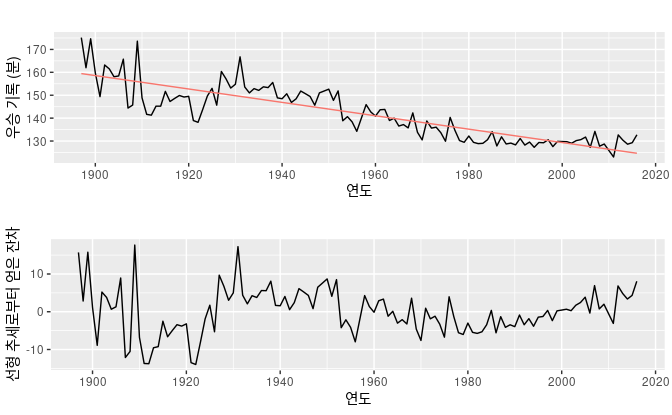

$y$ 변수를 변환하여, 맞춘 모델이

$$\log y_t=\beta_0+\beta_1 t +\varepsilon_t$$

가 되도록 지수 추세를 (로그-선형 회귀와 같은) 데이터에 맞출 수 있습니다. 이것 역시 이분산성(heteroscedasticity)을 설명합니다. 맞춘 지수 추세와 예상값을 그림에 나타냈습니다. 지수 추세가 선형 추세보다 데이터에 훨씬 더 잘 맞는 것 같지는 않지만, 우승 기록이 고정된 선형적 비율보다는 어떤 감소율을 가지고 감소할 것이라는 것을 나타내는 결과를 좀 더 알아볼 수 있는 형태로 냅니다.

기록 그래프에서 다른 시기 3개가 보입니다. 처음부터 약 1940년까지는 우승 기록의 변동성이 큽니다. 전반적으로 감소합니다만 1920년대에 유의미하게 증가합니다. 1940년 이후에는 시간에 따라 거의 선형적으로 감소하다가 1980년대 이후 평평해지고 그리고 표본의 끝까지 거의 상승하는 모습으로 나타납니다. 여기에서 조심해야 할 부분을 하나 강조하겠습니다. 데이터의 적당한 매듭(knot)을 주관적으로 찾는 것은 모델의 예측 성능에 해를 끼칠 수 있는 과도한 맞춤으로 이어질 수 있으니 주의 깊게 수행해야 합니다.

In [19]:
h <- 10

* 선형

In [20]:
fit.lin <- tslm(marathon ~ trend)
fcasts.lin <- forecast(fit.lin, h = h)

* 지수변환

In [21]:
fit.exp <- tslm(marathon ~ trend, lambda = 0)
fcasts.exp <- forecast(fit.exp, h = h)

* 조각

In [28]:
t <- time(marathon)
t.break1 <- 1940
t.break2 <- 1980

tb1 <- ts(pmax(0, t - t.break1), start = 1897)
tb2 <- ts(pmax(0, t - t.break2), start = 1897)

fit.pw <- tslm(marathon ~ t + tb1 + tb2)

* 3차 스플라인

In [29]:
t.new   <- t[length(t)] + seq(h)
tb1.new <- tb1[length(tb1)] + seq(h)
tb2.new <- tb2[length(tb2)] + seq(h)

newdata <- cbind(t=t.new, tb1=tb1.new, tb2=tb2.new) %>%
  as.data.frame()
fcasts.pw <- forecast(fit.pw,newdata = newdata)

fit.spline <- tslm(marathon ~ t + I(t^2) + I(t^3) +
  I(tb1^3) + I(tb2^3))
fcasts.spl <- forecast(fit.spline,newdata = newdata)

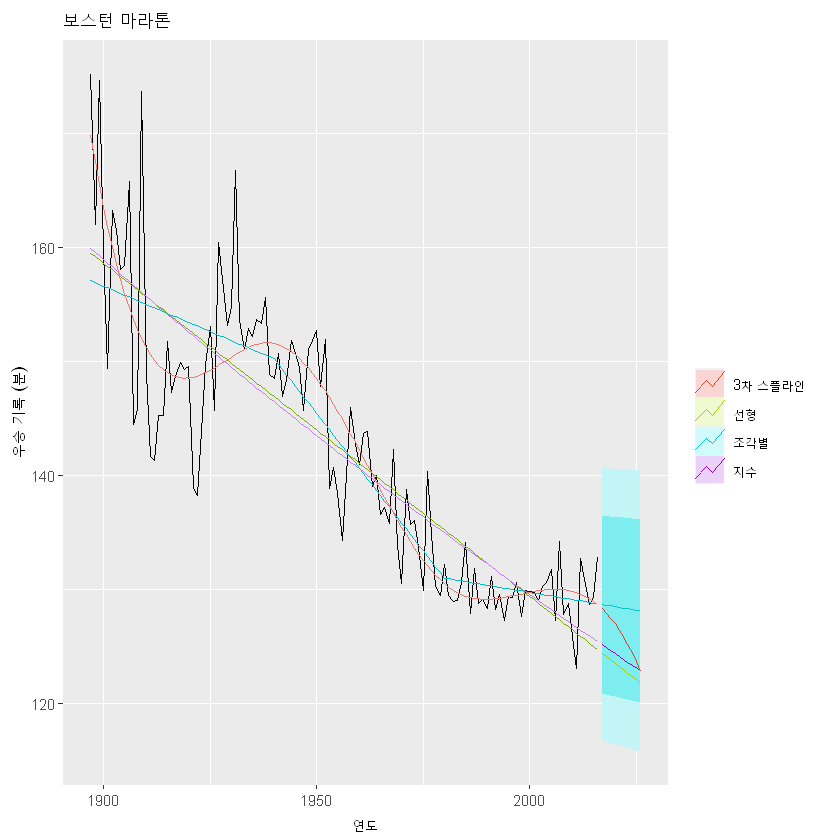

In [32]:
autoplot(marathon) +
  autolayer(fitted(fit.lin), series = "선형") +
  autolayer(fitted(fit.exp), series = "지수") +
  autolayer(fitted(fit.pw), series = "조각별") +
  autolayer(fitted(fit.spline), series = "3차 스플라인") +
  autolayer(fcasts.pw, series="조각별") +
  autolayer(fcasts.lin, series="선형", PI=FALSE) +
  autolayer(fcasts.exp, series="지수", PI=FALSE) +
  autolayer(fcasts.spl, series="3차 스플라인", PI=FALSE) +
  xlab("연도") +  ylab("우승 기록 (분)") +
  ggtitle("보스턴 마라톤") +
  guides(colour=guide_legend(title = " "))

3차 스플라인이 끝 부분에서 선형이 되도록 하는 몇 가지 제한조건이 더 들어가는 대안이 있는데 **“자연적 3차 평활 스플라인(natural cubic smoothing splines)”이라고 합니다.** 

보통 이렇게 변형한 것이 과거 데이터를 맞추는 정도의 변화 없이 종종 더 나은 예측값을 냅니다. 3차 스플라인 예측값을 얻기 위해 `splinef()` 함수를 사용했습니다. 더 많은 매듭(knot)을 사용합니다만, 과대적합(over-fitting)을 방지하기 위해 계수에 제한조건이 걸리고 양 끝에서 곡선이 선형이 됩니다.

여기에는 매듭 선택 방식이 주관적이지 않게 된다는 장점도 있습니다. 이분산성(heteroscedasticity)을 다루기 위해 로그 변환도 사용했습니다.

<br>

* 자연적 3차 평활 스플라인을 마라톤 데이터에 적용한 것. 관측된 데이터의 끝에서 추세의 선형 추정값이 예측값입니다.

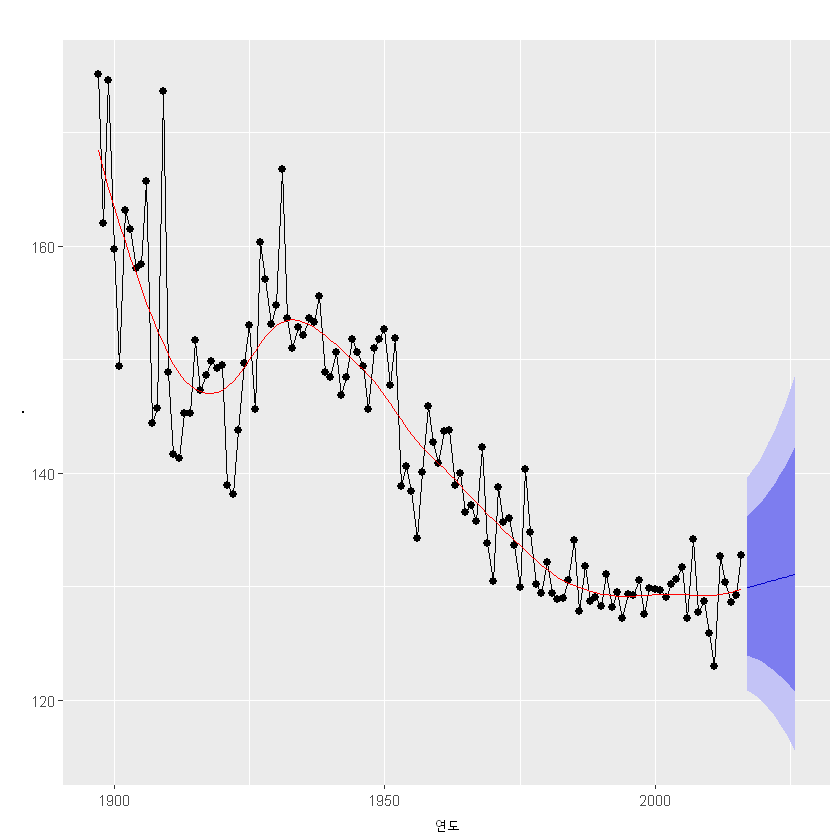

In [33]:
marathon %>%
  splinef(lambda=0) %>%
  autoplot() +
    xlab("연도")

* 잔차에 이분산성(heteroscedasticity)이 조금 남아있지만 모델이 추세를 잘 잡아낸 것을 나타냅니다. 예측값과 관련된 넓은 예측 구간은 과거 우승 기록에서 나타난 변동성을 반영하는 조각별 선형(piecewise linear) 추세를 이룹니다.

Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."


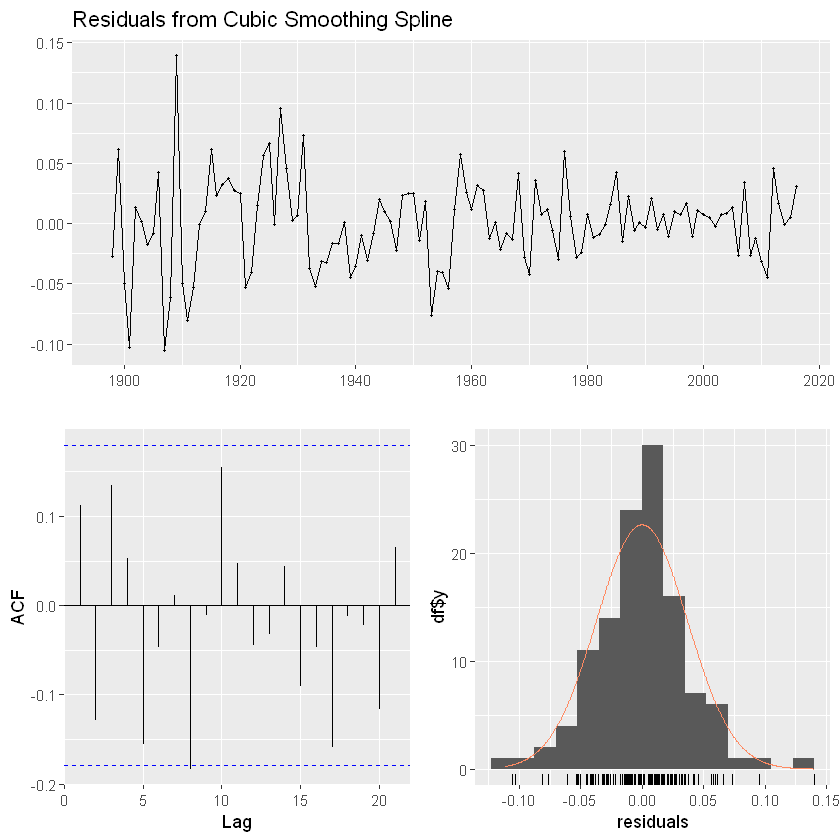

In [34]:
marathon %>%
  splinef(lambda=0) %>%
  checkresiduals()

<br>

## 05.09. 상관관계, 인과관계, 그리고 예측

<br>

### 상관관계는 인과관계가 아닙니다

상관관계(correlation)를 인과관계(causation)와 또는 인과관계를 예측하는 것과 혼동하지 않는 것은 중요합니다. 변수 $x$는 변수 $y$를 예측할 때 유용할 수 있습니다만, 이것이 $x$가 $y$의 원인이 된다는 의미는 아닙니다. $x$가 $y$의 원인이 될 수 있습니다만, $y$가  $x$의 원인이 될 수도 있고, 또는 둘 사이의 관계는 단순한 인과관계보다 더 복잡할 수 있습니다.

예를 들면, 매달 해변 리조트에서 물에 빠져 죽은 횟수를 해당 기간에 팔린 아이스크림 수와 함께 모델링할 수 있습니다. 이 모델이 그럴듯한 예측값을 줄 수 있습니다. 그 이유는 아이스크림 때문에 물에 빠져 죽지 않기 때문이 아니라, 더운 날에 사람들이 아이스크림을 더 많이 먹고 더운 날에 수영을 할 가능성도 높기 때문입니다. **따라서 두 변수(아이스크림 판매량과 물에 빠져 죽는 것)가 상관 관계가 있습니다만, 하나가 다른 하나의 원인인 것은 아닙니다.** 

두 가지 변수 모두 제 3의 변수인 기온이 원인입니다. 이것이 바로 생략된 변수가 반응변수(response variable)와 적어도 하나 이상의 예측 변수(predictor variable) 모두에 영향을 미치는 “혼선 (confounding)”의 예입니다.

**우리가 사용하는 예측 모델에 포함되지 않는 어떤 변수가 반응변수(response ariable)와 하나 이상의 예측변수(predictor variable) 모두에 영향을 줄 때, 이것을 혼선자(confounder)로 다룹니다.** 혼선(confounding)은 어떤 변수들이 다른 변수들에 영향을 주고 있는지 판단하기 어렵게 만들지만, 항상 예측 작업을 더 어렵게 만들지는 않습니다.

비슷하게, 아침에 길가에서 자전거 타는 사람의 수를 보고 오후에 비가 올 것인지 예측하는 것도 가능할 것입니다. 평소보다 자전거 타는 사람들이 적을 때는, 그 날에 오후에 비가 올 것이라서 그럴 수 있습니다. 모델이 그럴듯한 예측값을 낼 수 있겠지만, 이것은 자전거 타는 사람이 비를 오지 않게 하기 때문이 아니라, 사람이 공개된 일기 예보에서 비가 오지 않는다고 말할 때 자전거를 더 많이 탈 것이라서 그런 것입니다. 이 경우에, 인과관계가 있습니다만, 여기서 이야기하는 예측 모델과는 방향이 반대입니다. 비가 올 것이라는 예측 때문에 자전거 타는 사람이 줄어듭니다. 즉, $x$(강우)가 $y$(자전거 타는 사람)에 영향을 미칩니다.

**두 변수 사이에 상관관계가 없을 때나 모델과는 반대로 인과관계(causality)가 성립할 때도, 또는 혼선(confounding)이 있더라도, 상관관계(correlations)가 예측 작업에서는 유용하다는 것을 이해하는 것이 중요합니다.**

**하지만, 인과관계를 결정할 수 있으면, 종종 더 나은 모델이 가능합니다.** 이 예제에서, 아이스크림 판매량과 물에 빠져 죽는 것은 온도와 해변 리조트에 방문하는 사람 숫자에 영향을 받을 것입니다. 다시 한번 강조하지만, 높은 기온 때문에 실제로 사람이 죽는 것은 아닙니다만, 이러한 변수는 사람이 왜 수영을 하는지와 더욱 직접적으로 관련이 있습니다. 따라서 물에 빠져 죽는 것에 대한 더 나은 모델에는 아마도 온도, 방문자 수가 들어가고 아이스크림 판매량이 빠질 것입니다.

<br>

### 상관관계를 가지는 예측변수로 예측하기

두 개 이상의 예측변수(predictor)가 큰 상관관계를 가질 때, 각각의 효과를 정확하게 분리하는 것은 항상 쉽지 않은 일입니다. 2000년부터 2011년 데이터를 가지고 어떤 회사의 2012년 월별 매출을 예측하는 상황을 가정해봅시다. 2008년 1월에 새로운 경쟁자가 시장에 들어왔고, 시장 점유율을 가져가기 시작했습니다. 동시에, 경제 상황이 나빠지기 시작했습니다. 여러분은 여러분의 예측 모델에서, (지역 지상파 광고 시간을 이용하여 측정한) 경쟁자의 활동과 (GDP를 이용하여 측정한) 경제 상황 둘 다를 넣었습니다. 두 예측변수의 효과를 분리하는 것은 두 변수가 크게 상관관계를 가지고 있기 때문에 가능하지 않을 것입니다.

예측변수(predictor variable)의 효과들을 분리할 필요없이 예측값을 계산할 수 있기 때문에 상관관계를 가지는 에측변수들이 있다는 것은 실제로 예측할 때 큰 문제는 아닙니다. 하지만, 시나리오에 예측변수 사이의 관계가 들어가야만 하기 때문에, 시나리오 예측에서는 문제가 됩니다. 다양한 예측변수(predictor variable)의 기여도에 대한 과거 데이터 분석이 필요한 경우에도 문제가 됩니다.

<br>

### 다중공선성과 예측

**밀접하게 관련된 주제는 다중 회귀에 2개 이상의 예측변수(predictor variable)로 비슷한 정보가 주어질 때 나타나는 다중공선성(Multicollinearity)입니다.**

**이 성질은 두 예측변수(predictor variable)의 상관관계가 아주 높은 상황(즉, 상관 계수가 1이나 -1에 가까울 때)에서 나타날 수 있습니다. 이 경우에, 변수 중에서 하나의 값을 알면 다른 변수의 값을 추정할 수 있습니다. 따라서, 두 예측변수는 비슷한 정보를 주고 있는 셈입니다.** 예를 들면, 발 크기는 키를 예측하는데 사용할 수 있습니다만, 같은 모델에서 왼쪽 발과 오른쪽 발의 크기를 모두 사용한다고 해서 예측값을 더 나쁘게 만들지는 않을 것이더라도 더 나아지게 만들지는 않을 것입니다.

**다중공선성은 예측변수(predictor variable)의 선형결합(linear combination)이 예측변수의 다른 선형결합과 매우 상관관계가 높을 때도 나타날 수 있습니다. 이 경우에는, 첫 번째 예측변수의 묶음 값을 알면 두 번째 예측변수의 묶음의 값에 대한 정보를 많이 알 수 있습니다. 따라서, 두 묶음이 비슷한 정보를 주고 있는 셈입니다.**

가변수 함정(dummy variable trap)은 다중공선성(multicollinearity)의 특별한 경우입니다. 분기별 데이터를 가지고 있고 4개의 가변수($d_1$, $d_2$, $d_3$ 그리고 $d_4$)를 사용하는 상황을 가정해봅시다. 그러면 $d_4=1-d_1-d_2-d_3$이고, 따라서  $d_4$와 $d_1+d_2+d_3$사이에는 완벽한 상관관계가 있습니다.

완벽한 상관관계의 경우에는(즉, 가변수 함정처럼 상관계수가 +1이나 -1인), 회귀 모델을 추정할 수 없습니다.

상관관계가 크면(+1이나 -1에 가깝지만 같지는 않은), 회귀 계수를 계산하여 추정하는 것이 어렵습니다. 사실, 몇몇 소프트웨어(특히, 마이크로소프트 엑셀)은 아주 정확하지 않은 계수 추정치를 낼 수 있습니다. 대부분의 유명한 통계 소프트웨어는 계수 추정치에 대해 다중공선성의 효과를 제한하는 알고리즘을 사용할 것입니다만, 정말 조심할 필요가 있습니다. R, SPSS, SAS, Stata 같은 주요 소프트웨어 패키지는 모두 이러한 문제를 할 수 있는 한 피하기 위한 추정 알고리즘을 사용합니다.

**다중공선성이 나타날 때, 각 회귀 계수와 관련된 불확실성은 클 것입니다. 이것은 추정하기 어렵기 때문입니다. 결과적으로, 회귀 계수에 대한 통계 검정(즉, t-검정)을 신뢰할 수 없게 됩니다.** (예측할 때는 이러한 검정에 거의 관심을 두지 않습니다.) 또한, 예측값으로 이어지는 각각의 나뉜 예측변수(predictor variable)에 대해 정확하게 서술할 수 없을 것입니다.

미래 예측변수(predictor variable)의 값이 예측변수의 과거 값의 범위를 벗어날 때 예측값을 신뢰할 수 없게 될 것입니다. 예를 들면, 둘 사이의 상관관계가 아주 높은 예측변수 $x_1$과  $x_2$를 이용하는 회귀 모델을 맞춘다고 가정해봅시다. 그리고 맞춘 데이터에서 $x_1$의 값이 0과 100사이의 범위에 포함된다고 가정해봅시다. 그러면 $x_1 > 100$ 또는 $x_1 < 0$에 기초한 예측값은 신뢰할 수 없게 될 것입니다. 예측변수의 미래 값이 과거의 범위를 훨씬 넘어설 때는 항상 살짝 위험합니다만, 다중공선성(multicollinearity)이 있을 때는 특별히 위험합니다.

좋은 통계 소프트웨어를 사용하고 있고, 예측변수(predictor variable) 각각이 구체적으로 기여하는 양에 관심이 없고, 예측변수의 미래 값이 과거 범위에 들어가면, 특별히 걱정할 필요가 없습니다 — 완벽한 상관관계가 나타나는 경우를 제외하고는 다중공선성(multicollinearity)이 문제가 되지 않습니다.